<a href="https://colab.research.google.com/github/dartwinshu/dibimbing-machine-learning-application/blob/main/Dibimbing%20-%20Machine%20Learning%20Application%20-%20Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

## Context

Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs [IBM Sample Data Sets]

## Content

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

# List of Check Points


- CP #1 : Preparation 
- CP #2 : Data Quick look 
- CP #3 : Miscellaneous Handling
- CP #4 : Selection & Subset
- CP #5 : Transformation
- CP #6 : Joining table
- CP #7 : Aggregation & Sorting
- CP #8 : Visualization
- CP #9 : Dummy Var & Split Data
- CP #10 : Modeling

# Install & Load Library

CP #1

1. Melakukan pengecekan sistem
2. Melakukan library loading
3. Melakukan data set loading

In [162]:
# Mengecek python package version
!pip check

ipython 7.9.0 requires jedi, which is not installed.


In [163]:
# Mengecek modul apa yang telah terpasang
!pip freeze

absl-py==1.3.0
aeppl==0.0.33
aesara==2.7.9
aiohttp==3.8.3
aiosignal==1.3.1
alabaster==0.7.12
albumentations==1.2.1
altair==4.2.0
appdirs==1.4.4
arviz==0.12.1
astor==0.8.1
astropy==4.3.1
astunparse==1.6.3
async-timeout==4.0.2
atari-py==0.2.9
atomicwrites==1.4.1
attrs==22.1.0
audioread==3.0.0
autograd==1.5
Babel==2.11.0
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==5.0.1
blis==0.7.9
bokeh==2.3.3
branca==0.6.0
bs4==0.0.1
CacheControl==0.12.11
cachetools==5.2.0
catalogue==2.0.8
certifi==2022.9.24
cffi==1.15.1
cftime==1.6.2
chardet==3.0.4
charset-normalizer==2.1.1
click==7.1.2
clikit==0.6.2
cloudpickle==1.5.0
cmake==3.22.6
cmdstanpy==1.0.8
colorcet==3.0.1
colorlover==0.3.0
community==1.0.0b1
confection==0.0.3
cons==0.4.5
contextlib2==0.5.5
convertdate==2.4.0
crashtest==0.3.1
crcmod==1.7
cufflinks==0.17.3
cvxopt==1.3.0
cvxpy==1.2.2
cycler==0.11.0
cymem==2.0.7
Cython==0.29.32
daft==0.0.4
dalex==1.5.0
dask==2022.2.1
datascience==0.17.5
db-dtypes==1.0.4
debugpy==1.0.0
decorator==4.4.2
defusedxm

In [164]:
!pip install dalex
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [165]:
# Load pandas untuk data wrangling
import pandas as pd
# Load numpy untuk manipulasi vektor
import numpy as np
# Load matplotlib untuk visualisasi data
import matplotlib.pyplot as plt
# Load seaborn untuk visualisasi data
import seaborn as sns

# Load metrics object dari sklearn
from sklearn import metrics
# Load train-test data splitter
from sklearn.model_selection import train_test_split
# Load Decision Tree classifier model
from sklearn.tree import DecisionTreeClassifier
# Load Random Forest classifier model
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
# Load SVM classifier model
from sklearn.svm import SVC
# Load KNN classifier model
from sklearn.neighbors import KNeighborsClassifier
# Load logistic regression model
from sklearn.linear_model import LogisticRegression
# Load xgboost classifier model
from xgboost import XGBClassifier

# Load DALEX untuk interpretability
import dalex as dx

# Load scikitplot untuk visualisasi metrik
import scikitplot as skplt

%matplotlib inline

# Load Dataset

In [166]:
# Load dataset ke raw_data
raw_data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Data Inspection

In [167]:
# Cek struktur data
## Mengetahui jenis dan jumlah data
raw_data.info()
## Melihat contoh sampel data secara acak
raw_data.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3205,3810-DVDQQ,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),117.60,8308.9,No
3467,8414-MYSHR,Male,1,No,No,5,Yes,No,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,91.40,449.75,Yes
718,1853-ARAAQ,Female,0,No,No,26,No,No phone service,DSL,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),50.35,1277.5,No
2347,7089-RKVSZ,Male,0,Yes,Yes,8,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,24.40,203.95,No
4648,9717-QEBGU,Male,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.30,144,No
1488,8695-WDYEA,Male,0,No,No,1,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,51.25,51.25,No
5930,8398-TBIYD,Female,0,No,No,72,Yes,Yes,Fiber optic,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),84.70,6185.15,No
5276,2725-IWWBA,Male,0,Yes,Yes,46,Yes,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Mailed check,56.90,2560.1,No
1995,8000-REIQB,Female,1,No,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,69.95,69.95,Yes
867,2732-ISEZX,Female,0,No,No,5,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.50,104.3,No


In [168]:
# Cek data yang hilang
## Mengetahui berapa banyak data yang kosong
raw_data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [169]:
# Karena ada kolom TotalCharges yang aneh sebelumnya, maka dilakukan analisa lebih lanjut
# Meng-copy data untuk menghindari edit pada data primer langsung
raw_data_copy = raw_data

# Menampilkan data kolom TotalCharges yang mengandung spasi
raw_data_copy[raw_data_copy.TotalCharges.str.isspace()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [170]:
# Karena terdapat data yang hilang, maka harus melaporkan adanya data yang hilang kepada user dan/atau pihak yang bertanggungjawab dengan data
## Jika sudah diberikan instruksi atau izin untuk meng-handle data yang hilang
## Jika diamati TotalCharges memiliki nilai yang sama dengan hasil perkalian tenure dengan MonthlyCharges, maka data yang hilang dapat diganti dengan hasil tenure * MonthlyCharges

## Melakukan looping untuk menghitung TotalCharges_new
raw_data_copy_new = raw_data_copy[raw_data_copy.TotalCharges.str.isspace()]

TotalCharge_new = []

for tenure, MonthlyCharges in zip(raw_data_copy_new['tenure'], raw_data_copy_new['MonthlyCharges']):
    TotalCharge_new.append(tenure * MonthlyCharges)

# Menambahkan TotalCharge_new kedalam data kolom TotalCharges
raw_data_copy_new['TotalCharges'] = TotalCharge_new

# Menampilkan data kolom TotalCharges yang sudah diperbaiki
raw_data_copy_new

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.0,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0.0,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0.0,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0.0,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0.0,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.0,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0.0,No


In [171]:
# Melakukan perubahan langsung pada data primer
raw_data[raw_data.TotalCharges.str.isspace()] = raw_data_copy_new

# Menghapus spasi, jika masih terdapat spasi pada data kolom TotalCharges yang lainnya
raw_data['TotalCharges'] = pd.to_numeric(raw_data['TotalCharges'].astype(str).str.strip())

In [172]:
# Menampilkan dan mengecek Dtype TotalCharges
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Interpretasi**

Berdasarkan hasil pengecekan data menggunakan method info() dan sample(), maka dapat diketahui:

  - Sebanyak 17 kolom ber-Dtype Object
  - Sebanyak 2 kolom ber-Dtype int64
  - Sebanyak 1 kolom ber-Dtype float64
  - Sebanyak 10 sample data dari masing-masing kolom

  Jika data berupa angka yang menunjukkan jumlah, banyak, atau nilai boolean (1 atau 0), maka data tsb merupakan data numerical. Sedangkan jika data berupa huruf yang mendeskripsikan keterangan, maka data tsb merupakan data categorical
  
  Meskipun terdapat kolom TotalCharges yang aneh ber-Dtype Object, tetapi setelah dicek dari data sample, maka diketahui data TotalCharges seharusnya merupakan data numerical
  
  Oleh karena itu, maka dapat disimpulkan:

  - Variabel yang bertipe numerical adalah: (Sebanyak 4 data)
    - SeniorCitizen
    - tenure
    - MonthlyCharges
    - TotalCharges
  - Variabel yang bertipe categorical adalah: (Sebanyak 17 data)
    - customerID
    - gender
    - Partner
    - Dependents
    - PhoneService
    - MultipleLines
    - InternetService
    - OnlineSecurity
    - OnlineBackup
    - DeviceProtection
    - TechSupport
    - StreamingTV
    - StreamingMovies
    - Contract
    - PaperlessBilling
    - PaymentMethod
    - Churn

Berdasarkan hasil pengecekan data menggunakan method info() dan isna().sum(), maka dapat diketahui:

  - Jumlah baris untuk semua kolom adalah sama, sebanyak 7043 baris
  - Jumlah baris yang kosong untuk masing-masing kolom adalah 0

  Dengan hasil diatas, dapat diketahui bahwa tidak ada data kosong, tetapi tidak berarti tidak ada data yang hilang

  Karena ada kolom TotalCharges yang aneh sebelumnya, maka dilakukan analisa lebih lanjut. Percobaan dilakukan dengan filter apakah ada data yang **hanya mengandung space** pada data kolom TotalCharges yang mungkin tidak sengaja di-input dengan metode isspace()
  
  Dari hasil pengecekan yang dilakukan diketahui terdapat 11 baris dimana data kolom TotalCharges yang hanya mengandung spasi
  
  Oleh karena itu, maka dapat disimpulkan:
  - Terdapat data yang hilang, yaitu data kolom TotalCharges. Data kolom TotalCharges yang hilang adalah data yang berada di baris dimana nilai Tenure berupa 0. Sedangkan ketika diamati, data TotalCharges dihitung berdasarkan perkalian antara nilai Tenure dan MonthlyCharges. Maka dari itu, dapat disimpulkan data yang hilang termasuk data Missing Not at Random (MNAR), karena berpola/logika
  - Hal yang perlu dilakukan adalah **melaporkan adanya data yang hilang kepada user dan/atau pihak yang bertanggungjawab terhadap data tsb**, karena semua pihak yang berhubungan dengan data tsb sebaiknya mengetahuinya supaya kedepannya ketika dilakukan survei, kuisioner, atau proses perolehan atau pengumpulan data dapat mencegah hal tsb terjadi kembali atau bisa memperbaikinya. Lalu setelah itu, baru dilakukan pengambilan keputusan untuk memperbaiki data tsb dengan metode tertentu. Karena berdasarkan logika TotalCharges diperoleh dari hasil perkalian Tenure dan MonthlyCharges, maka data yang hilang tsb dapat diisi dengan logika yang sama pula

# Train-Test Split Data

In [173]:
# buang kolom Churn dari raw_data lalu masukkan ke X
X = raw_data.drop(["Churn"], axis = 1)
# masukkan nilai kolom Churn ke y
y = raw_data["Churn"]

In [174]:
# pisahkan data menjadi data train dan data test
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y, 
    test_size=0.2,
    stratify = y, 
    random_state=1000
)

# Exploratory Data Analysis

In [175]:
# Buat kolom Churn pada X_train dengan memasukkan nilai y_train ke dalamnya
X_train["Churn"] = y_train

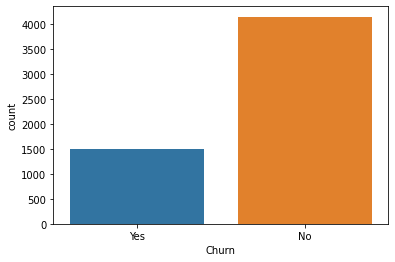

In [176]:
# Cek distribusi kelas target

# Pengecekan variabel Churn
sns.countplot(data = X_train, x = "Churn")

In [177]:
# Pengecekan proporsi variabel Churn
X_train['Churn'].value_counts(normalize=True)

No     0.734647
Yes    0.265353
Name: Churn, dtype: float64

Interpretasi

Berdasarkan hasil visualisasi distribusi churn, maka dapat diketahui:
  - Data customer yang keluar/membatalkan/menghentikan (Churn = Yes) penggunaan produk perusahaan ada sebanyak sekitar 1500 data
  - Data customer yang tetap (Churn = No) melakukan penggunaan produk perusahaan ada sebanyak sekitar 4000 data
  - Proporsi jumlah data customer yang berhenti dan yang bertahan masing-masing adalah sekitar 27% dan 73%
  
  Oleh karena itu, maka dapat disimpulkan:
  - Distribusi antara data customer yang bertahan dan yang berhenti tidak seimbang, karena jauh dari perbandingan ideal 5:5 atau setara

Distribusi antara customer yang bertahan dan yang berhenti yang tidak seimbang, sebaiknya ditangani dengan cara:
  - Memahami tujuan dari penelitian/analisa/tugas. Pada kasus ini tujuan tugas ini adalah untuk menganalisa mengapa/faktor yang mempengaruhi customer berhenti (Churn = Yes)
  - Memperhatikan metrix evaluasi f1-score berdasarkan tujuan dari tugas. Pada kasus ini adalah f1-score untuk Churn = Yes
  - Jika f1-score untuk Churn = Yes terlalu rendah, maka dapat ditangani dengan solusi:
    - Menambah data customer yang berhenti sehingga bisa mencapai jumlah yang hampir sama, setidaknya 4:6 dengan data customer yang bertahan menggunakan produk perusahaan, karena dapat meningkatkan akurasi metrik evaluasi modelling
    - Mengganti metode modelling yang digunakan sehingga menghasilkan metrix evaluasi f1-score untuk Churn = Yes yang lebih tinggi
    - Melakukan Threshold Optimization menggunakan G-means, karena dapat meningkatkan f1-score untuk Churn = Yes

In [178]:
#Menghapus kolom customerID
X_train_edit = X_train.drop('customerID', axis = 1)
X_test_edit = X_test.drop('customerID', axis = 1)

#Mengubah posisi variabel taget Churn
churn_col = X_train_edit.pop('Churn')
X_train_edit = pd.concat([X_train_edit,churn_col], 1)

#Membuat dummy variabel dari variabel categorical pada X_train_edit
X_train_edit = pd.get_dummies(X_train_edit, drop_first = True)

#Membuat dummy variabel dari variabel categorical pada X_train_test
X_test_edit = pd.get_dummies(X_test_edit, drop_first = True)

#Menampilkan X_train_edit dan X_test_edit
print(X_train_edit.info(10))
print(X_test_edit.info(10))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5634 entries, 232 to 6071
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          5634 non-null   int64  
 1   tenure                                 5634 non-null   int64  
 2   MonthlyCharges                         5634 non-null   float64
 3   TotalCharges                           5634 non-null   float64
 4   gender_Male                            5634 non-null   uint8  
 5   Partner_Yes                            5634 non-null   uint8  
 6   Dependents_Yes                         5634 non-null   uint8  
 7   PhoneService_Yes                       5634 non-null   uint8  
 8   MultipleLines_No phone service         5634 non-null   uint8  
 9   MultipleLines_Yes                      5634 non-null   uint8  
 10  InternetService_Fiber optic            5634 non-null   uint8  
 11  In

<ipython-input-178-a5277a1e29be>:7: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  X_train_edit = pd.concat([X_train_edit,churn_col], 1)


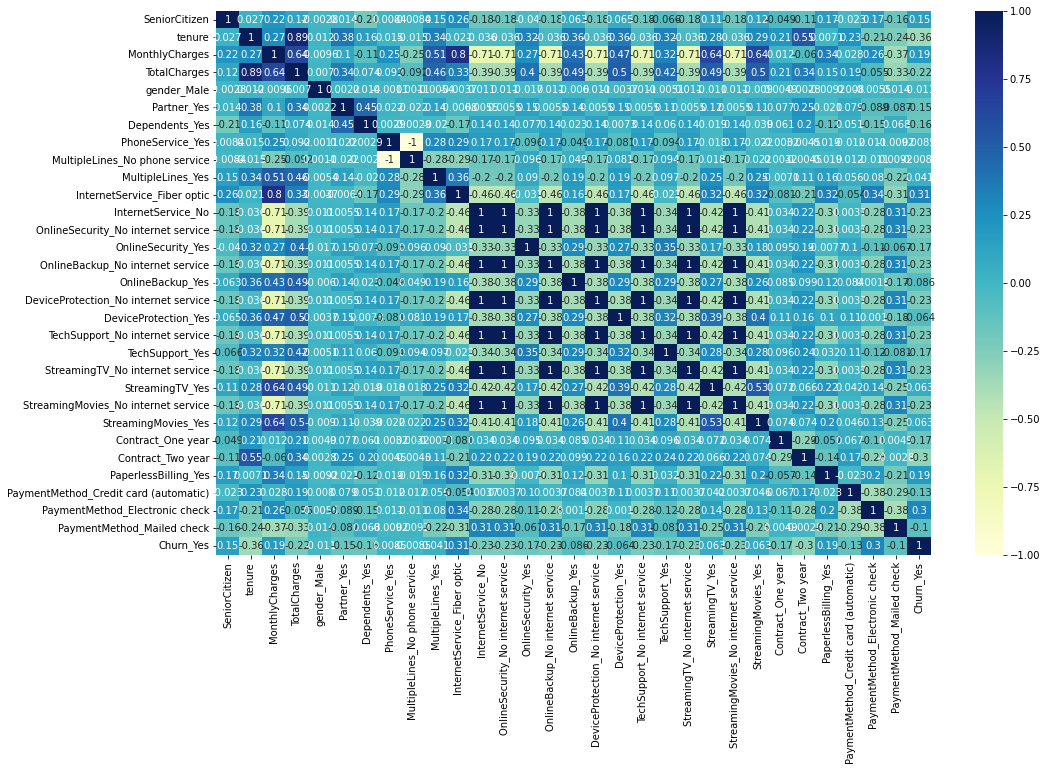

In [179]:
# Matrix correlation

#Membuat matrix correlation dengan metode Spearman
plt.figure(figsize=(16,10))
sns.heatmap(X_train_edit.corr(method='spearman'), cmap="YlGnBu", annot=True)

**Interpretasi**

Dari hasil visualisasi matrix correlation dengan metode Spearman dapat diketahui:
  - TotalCharges dengan StreamingMovies_Yes, StreamingTV_Yes, DeviceProtection_Yes, OnlineBackup_Yes, Tenure, dan MonthlyCharges memiliki hubungan yang kuat dengan korelasi yang berbeda-beda, tetapi rata-rata > 0,5
  - MonthlyCharges dengan InternetService_Fiber optic memiliki hubungan yang cukup kuat dengan korelasi sebesar 0,64
  - Tenure dengan Contract_Two year memiliki hubungan yang cukup kuat dengan korelasi sebesar 0,55
  - Multiplelines_No phone service dengan PhoneService_Yes memiliki hubungan yang sangat kuat dengan korelasi sebesar -1
  - InternetService_No dengan OnlineSecurity_No internet service, OnlineBackup_No internet service, DeviceProtection_No internet service, TechSupport_No internet service, StreamingTV_No internet service, dan StreamingMovies_No internet service memiliki hubungan yang sangat kuat dengan korelasi sebesar 1
  - StreamingTV_Yes dengan StreamingMovies_Yes memiliki hubungan yang cukup kuat dengan korelasi sebesar 0,53

  Berdasarkan hasil visualisasi diatas, maka dapat disimpulkan:
  - TotalCharges dipengaruhi kuat oleh layanan seperti Streaming Movies, Streaming TV, Device Protection, dan Online Backup. Selain itu, TotalCharges dihitung dari perkalian dari Tenure dan MonthlyCharges sehingga juga dipengaruhi kuat oleh faktor tsb.
  - MonthlyCharges dipengaruhi kuat oleh layanan Internet Service berupa Fiber Optic, kemungkinan karena layanan tsb sebenarnya juga termasuk layanan yang cukup mahal, tetapi belum banyak customer yang mengambil jenis kontrak yang cukup lama untuk layanan tsb
  - Tenure dipengaruhi kuat oleh jenis kontrak 2 tahun, karena kontrak 2 tahun memiliki jangka kontrak yang paling lama sehingga dapat menambah nilai tenure dengan banyak
  - Internet Service No mempengaruhi layanan-layanan yang membutuhkan internet dengan pasti karena tanpa internet layanan-layanan tsb tidak dapat dilaksanakan
  - Streaming Movies dipengaruhi kuat oleh Streaming TV, kemungkinan karena customer membeli kedua layanan tsb secara bersama dalam kebanyakan kasus

  Tindakan lanjut/saran untuk variabel yang saling memiliki korelasi yang kuat adalah sebaiknya menghilangkan satu atau beberapa variabel yang ada dalam setiap kasusnya hingga dalam matrix correlation tidak ada lagi variabel-variabel yang memiliki korelasi yang terlalu kuat

## Categorical Data vs Churn

In [180]:
# Definisikan fungsi untuk menghitung proporsi
def prop_agg(df, y, x):
  temp_df = df.groupby([y,x], as_index = False).size()
  temp_df['prop'] = temp_df['size'] / temp_df.groupby(y)['size'].transform('sum')
  return temp_df

**Gender vs Churn**

In [181]:
# hitung proporsi gender dan Churn

#Menghitung proporsi variabel gender terhadap Churn
prop_agg(X_train, 'gender', "Churn")

,gender,Churn,size,prop
0,Female,No,2022,0.729700
1,Female,Yes,749,0.270300
2,Male,No,2117,0.739434
3,Male,Yes,746,0.260566


**Interpretasi**

Jenis kelamin laki-laki dan perempuan tidak berpengaruh signifikan terhadap customer churn, karena dapat dilihat pada proporsi dari masing-masing jenis kelamin dan customer churn tidak memiliki perbedaan yang besar

Selain itu, size/jumlah jenis kelamin untuk masing-masing jenis customer churn  tidak berbeda jauh

**Senior Citizen vs Churn**


In [182]:
#Menghitung proporsi variabel SeniorCitizen terhadap Churn
prop_agg(X_train, 'SeniorCitizen', "Churn")

,SeniorCitizen,Churn,size,prop
0,0,No,3618,0.764097
1,0,Yes,1117,0.235903
2,1,No,521,0.579533
3,1,Yes,378,0.420467


**Interpretasi**

Jenis status Senior Citizen berpengaruh signifikan terhadap customer churn, karena dapat dilihat pada proporsi dari masing-masing jenis status Senior Citizen dan customer churn memiliki perbedaan sekitar 20%

Status Senior Citizen yang Tidak (0) cenderung menghasilkan customer churn yang No, dan sebaliknya

Selain itu, size/jumlah jenis kelamin untuk masing-masing jenis customer churn  tidak berbeda jauh

**Partner vs Churn**

In [183]:
#Menghitung proporsi variabel Partner terhadap Churn
prop_agg(X_train, 'Partner', "Churn")

,Partner,Churn,size,prop
0,No,No,1938,0.670356
1,No,Yes,953,0.329644
2,Yes,No,2201,0.802406
3,Yes,Yes,542,0.197594


**Interpretasi**

Jenis status Partner berpengaruh signifikan terhadap customer churn, karena dapat dilihat pada proporsi dari amsing-masing jenis status Partner dan customer churn yang memiliki perbedaan sekitar 13%

Status Partner yang Yes cenderung menghasilkan customer churn yang No, dan sebegainya

Selain itu, size/jumlah jenis status Partner untuk masing-masing jenis customer chrun tidak berbeda jauh

**Dependent vs Churn**

In [184]:
#Menghitung proporsi variabel Dependents terhadap Churn
prop_agg(X_train, 'Dependents', "Churn")

,Dependents,Churn,size,prop
0,No,No,2706,0.687151
1,No,Yes,1232,0.312849
2,Yes,No,1433,0.844929
3,Yes,Yes,263,0.155071


**Interpretasi**

Jenis status Dependents berpengaruh signifikan terhadap customer churn, karena dapat dilihat pada proporsi dari masing-masing jenis status Dependents dan customer churn memiliki perbedan sekitar 16%

Status Dependents yang Yes cenderung menghasilkan customer churn yang No, dan sebaliknya

Selain itu, size/jumlah jenis Dependents untuk masing-masing jenis customerchurn berbeda jauh

**Online Security vs Churn**

In [185]:
#Menghitung proporsi variabel OnlineSecurity terhadap Churn
prop_agg(X_train, 'OnlineSecurity', "Churn")

,OnlineSecurity,Churn,size,prop
0,No,No,1626,0.581753
1,No,Yes,1169,0.418247
2,No internet service,No,1121,0.928749
3,No internet service,Yes,86,0.071251
4,Yes,No,1392,0.852941
5,Yes,Yes,240,0.147059


**Interpretasi**

Jenis status Online Security berpengaruh signifikan terhadap customer churn, karena dapat dilihat pada proporsi dari masing-masing jenis status Online Security dan customer churn memiliki perbedaan 7% - 34%

Status Online Security yang paling cenderung menghasilkan customer churn yang Yes secara berturut-turut adalah status Online Security yang No, Yes, dan No Internet Service

Selain itu, size/jumlah jenis status Online Security untuk masing-masing jenis customer churn berbeda jauh

**Online Backup vs Churn**

In [186]:
#Menghitung proporsi variabel OnlineBackup terhadap Churn
prop_agg(X_train, 'OnlineBackup', "Churn")

,OnlineBackup,Churn,size,prop
0,No,No,1475,0.598377
1,No,Yes,990,0.401623
2,No internet service,No,1121,0.928749
3,No internet service,Yes,86,0.071251
4,Yes,No,1543,0.786442
5,Yes,Yes,419,0.213558


**Interpretasi**

Jenis status Online Backup berpengaruh signifikan terhadap customer churn, karena dapat dilihat pada proporsi dari masing-masing jenis status Online Backup dan customer churn memiliki perbedaan 14% - 32%

Status Online Backup yang paling cenderung menghasilkan customer churn yang Yes secara berturut-turut adalah status Online Backup yang No, Yes, No Internet Service

Selain itu, size/jumlah jenis status Online Backup untuk masing-masing jenis customer churn tidak berbeda jauh, jik a mengabaikan No Internet Service

**Device Protection vs Churn**

In [187]:
#Menghitung proporsi variabel DeviceProtection terhadap Churn
prop_agg(X_train, 'DeviceProtection', "Churn")

,DeviceProtection,Churn,size,prop
0,No,No,1510,0.609608
1,No,Yes,967,0.390392
2,No internet service,No,1121,0.928749
3,No internet service,Yes,86,0.071251
4,Yes,No,1508,0.773333
5,Yes,Yes,442,0.226667


**Interpretasi**

Jenis status Device Protection berpengaruh signifikan terhadap customer churn, karena dapat dilihat pada proporsi dari masing-masing jenis status Device Protection and customer churn memiliki perbedaan 13% - 32%

Status Device Protection yang paling cenderung menghasilkan customer churn yang Yes secara berturut-turut adalah status Device Protection yang No, Yes, No Internet Service

Selain itu, size/jumlah jenis status Device Protection untuk masing-masing jenis customer churn tidak berbeda jauh, jika mengabaikan No Internet Service

**Streaming TV vs Churn**

In [188]:
#Menghitung proporsi variabel StreamingTV terhadap Churn
prop_agg(X_train, 'StreamingTV', "Churn")

,StreamingTV,Churn,size,prop
0,No,No,1489,0.664436
1,No,Yes,752,0.335564
2,No internet service,No,1121,0.928749
3,No internet service,Yes,86,0.071251
4,Yes,No,1529,0.699451
5,Yes,Yes,657,0.300549


**Interpretasi**

Jenis status Streaming TV berpengaruh tidak signifikan terhadap customer churn, karena dapat dilihat pada proporsi dari masing-masing jenis status  Streaming TV and customer churn hanya memiliki perbedaan 3%, jika mengabaikan status Streaming TV yang No Internet Service, yang memiliki perbedaan >30%

Status Streaming yang paling cenderung menghasilkan customer churn yang Yes secara berturut-turut adalah status  Streaming TV yang No, Yes, No Internet Service

Selain itu, size/jumlah jenis status Streaming TV untuk masing-masing jenis customer churn tidak berbeda jauh, jika mengabaikan No Internet Service

**Streaming Movies vs Churn**

In [189]:
#Menghitung proporsi variabel StreamingMovies terhadap Churn
prop_agg(X_train, 'StreamingMovies', "Churn")

,StreamingMovies,Churn,size,prop
0,No,No,1494,0.664591
1,No,Yes,754,0.335409
2,No internet service,No,1121,0.928749
3,No internet service,Yes,86,0.071251
4,Yes,No,1524,0.699403
5,Yes,Yes,655,0.300597


**Interpretasi**

Jenis status Streaming Movies berpengaruh tidak signifikan terhadap customer churn, karena dapat dilihat pada proporsi dari masing-masing jenis status  Streaming Movies and customer churn hanya memiliki perbedaan 3%, jika mengabaikan status Streaming TV yang No Internet Service, yang memiliki perbedaan >30%

Status Streaming yang paling cenderung menghasilkan customer churn yang Yes secara berturut-turut adalah status Streaming Movies yang No, Yes, No Internet Service

Selain itu, size/jumlah jenis status Streaming Movies untuk masing-masing jenis customer churn tidak berbeda jauh, jika mengabaikan No Internet Service

**Contract vs Churn**

In [190]:
#Menghitung proporsi variabel Contract terhadap Churn
prop_agg(X_train, 'Contract', "Churn")

,Contract,Churn,size,prop
0,Month-to-month,No,1748,0.570496
1,Month-to-month,Yes,1316,0.429504
2,One year,No,1065,0.882353
3,One year,Yes,142,0.117647
4,Two year,No,1326,0.972854
5,Two year,Yes,37,0.027146


**Interpretasi**

Jenis Contract berpengaruh signifikan terhadap customer churn, karena dapat dilihat pada proporsi dari masing-masing jenis Contract and customer churn hanya memiliki perbedaan 9% - 31%

Status Streaming yang paling cenderung menghasilkan customer churn yang Yes secara berturut-turut adalah Contract yang Month-to-Month, One Year, Two Year

Selain itu, size/jumlah jenis Contract untuk masing-masing jenis customer churn berbeda jauh

**Tech Support vs Churn**

In [191]:
#Menghitung proporsi variabel TechSupport terhadap Churn
prop_agg(X_train, 'TechSupport', "Churn")

,TechSupport,Churn,size,prop
0,No,No,1615,0.581982
1,No,Yes,1160,0.418018
2,No internet service,No,1121,0.928749
3,No internet service,Yes,86,0.071251
4,Yes,No,1403,0.849274
5,Yes,Yes,249,0.150726


**Interpretasi**

Jenis status Tech Support berpengaruh signifikan terhadap customer churn, karena dapat dilihat pada proporsi dari masing-masing jenis status Tech Support and customer churn memiliki perbedaan 8% - 34%

Status Tech Support yang paling cenderung menghasilkan customer churn yang Yes secara berturut-turut adalah status Tech Support yang No, Yes, No Internet Service

Selain itu, size/jumlah jenis status Tech Support untuk masing-masing jenis customer churn berbeda jauh

**Paperless Billing vs Churn**

In [192]:
#Menghitung proporsi variabel PaperlessBilling terhadap Churn
prop_agg(X_train, 'PaperlessBilling', "Churn")

,PaperlessBilling,Churn,size,prop
0,No,No,1925,0.83805
1,No,Yes,372,0.16195
2,Yes,No,2214,0.66347
3,Yes,Yes,1123,0.33653


**Interpretasi**

Jenis status Papaerless Billing berpengaruh signifikan terhadap customer churn, karena dapat dilihat pada proporsi dari masing-masing jenis status Papaerless Billing and customer churn memiliki perbedaan 17%

Status Papaerless Billing yang Yes cenderung menghasilkan customer churn yang Yes, dan sebaliknya

Selain itu, size/jumlah jenis status Papaerless Billing untuk masing-masing jenis customer churn berbeda jauh

**Payment Method vs Churn**

In [193]:
#Menghitung proporsi variabel PaymentMethod terhadap Churn
prop_agg(X_train, 'PaymentMethod', "Churn")

,PaymentMethod,Churn,size,prop
0,Bank transfer (automatic),No,1018,0.827642
1,Bank transfer (automatic),Yes,212,0.172358
2,Credit card (automatic),No,1046,0.844229
3,Credit card (automatic),Yes,193,0.155771
4,Electronic check,No,1025,0.545213
5,Electronic check,Yes,855,0.454787
6,Mailed check,No,1050,0.817121
7,Mailed check,Yes,235,0.182879


**Interpretasi**

Jenis Payment Method berpengaruh signifikan terhadap customer churn, karena dapat dilihat pada proporsi dari masing-masing jenis Payment Method and customer churn memiliki perbedaan 1% - 30%

Payment Method yang paling cenderung menghasilkan customer churn yang Yes secara berturut-turut adalah status Payment Method yang Electronic Check, Mailed Check, Bank Transfer (Automatic), Credit Card (Automatics)

Selain itu, size/jumlah jenis status Payment Method untuk masing-masing jenis customer churn tidak berbeda jauh

**Phone Service vs Churn**

In [194]:
#Menghitung proporsi variabel PhoneService terhadap Churn
prop_agg(X_train, 'PhoneService', "Churn")

,PhoneService,Churn,size,prop
0,No,No,417,0.745975
1,No,Yes,142,0.254025
2,Yes,No,3722,0.733399
3,Yes,Yes,1353,0.266601


**Interpretasi**

Jenis status Phone Service mungkin tidak berpengaruh signifikan terhadap customer churn, karena dapat dilihat pada proporsi dari masing-masing jenis status Papaerless Billing and customer churn memiliki perbedaan yang kecil

Namun, perlu diperhatikan size/jumlah jenis status PhoneService untuk masing-masing jenis customer churn berbeda jauh

**Internet Service vs Churn**

In [195]:
#Menghitung proporsi variabel InternetService terhadap Churn
prop_agg(X_train, 'InternetService', "Churn")

,InternetService,Churn,size,prop
0,DSL,No,1586,0.812084
1,DSL,Yes,367,0.187916
2,Fiber optic,No,1432,0.578820
3,Fiber optic,Yes,1042,0.421180
4,No,No,1121,0.928749
5,No,Yes,86,0.071251


**Interpretasi**

Jenis Internet Service berpengaruh signifikan terhadap customer churn, karena dapat dilihat pada proporsi dari masing-masing jenis Internet Service and customer churn memiliki perbedaan 11% - 35%

Internet Service yang paling cenderung menghasilkan customer churn yang Yes secara berturut-turut adalah status Internet Service yang Fiber Optic, DSL, No

Selain itu, size/jumlah jenis status Internet Service untuk masing-masing jenis customer churn berbeda jauh

## Numerical Data vs Churn

**Total Charges vs Churn**

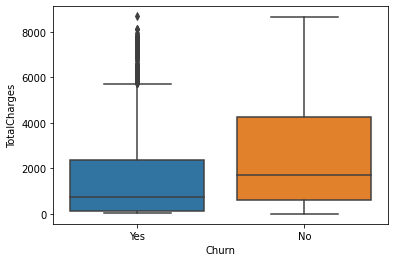

In [196]:
#Membuat visualisasi hubungan variabel TotalCharges terhadap Churn
sns.boxplot(data = X_train, x = 'Churn', y = 'TotalCharges')

**Interpretasi**

Total Charges berpengaruh signifikan terhadap customer churn, karena dapat dilihat pada median TotalCharges pada masing-masing customer churn berbeda sekitar 1000 satuan TotalCharges

Median Total Charges yang paling cenderung menghasilkan customer churn yang Yes adalah sekitar >1000 satuan Total Charges

Selain itu, dapat diketahui terdapat nilai-nilai outlier pada customer churn yang Yes karena ada titik-titik di luar rentang garis

**Monthly Charges vs Churn**

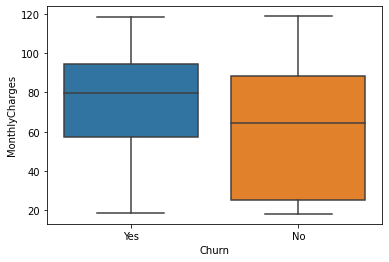

In [197]:
#Membuat visualisasi hubungan variabel MonthlyCharges terhadap Churn
sns.boxplot(data = X_train, x = 'Churn', y = 'MonthlyCharges')

**Interpretasi**

Monthly Charges berpengaruh signifikan terhadap customer churn, karena dapat dilihat pada median Monthly Charges pada masing-masing customer churn berbeda sekitar 15 satuan Monthly Charges

Median Monthly Charges yang paling cenderung menghasilkan customer churn yang Yes adalah sekitar 80 satuan Monthly Charges

**Tenure**

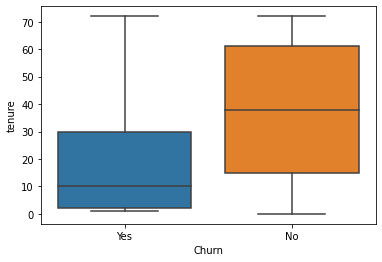

In [198]:
#Membuat visualisasi hubungan  variabel tenure terhadap Churn
sns.boxplot(data = X_train, x = 'Churn', y = 'tenure')

**Interpretasi**

Tenure berpengaruh signifikan terhadap customer churn, karena dapat dilihat pada median Tenure pada masing-masing customer churn berbeda sekitar 30 satuan Tenure

Median Tenure yang paling cenderung menghasilkan customer churn yang Yes adalah sekitar 10 satuan Tenure

---

In [199]:
# buang kolom Churn dari X_train
X_train = X_train.drop(["Churn"], axis = 1)

In [200]:
# buang kolom Churn dari X_train_edit
X_train_edit = X_train_edit.drop(["Churn_Yes"], axis = 1)

# Modeling

## Define Model

**Logistic Regression**

In [279]:
# Mendefinisikan model Logistic Regression
loreg_model = LogisticRegression( random_state = 123, max_iter = 1000)

**KNN**

In [202]:
# Mendefinisikan model KNN
knn_model = KNeighborsClassifier(n_neighbors=5)

**Decision Tree**

In [203]:
# Mendefinisikan model Decision Tree
dt_model = DecisionTreeClassifier(max_depth=5, ccp_alpha=0.001)

**Random Forest**

In [204]:
# Mendefinisikan model Random Forest
rf_model = RandomForestClassifier(n_estimators = 1000, random_state = 1000)

**Bagging**

In [303]:
# Mendefinisikan model Bagging
bag_model = BaggingClassifier()

**Ada Boost**

In [206]:
# Mendefinisikan model AdaBoost
ada_model = AdaBoostClassifier()

**Gradient Boosting Classifier**

In [207]:
# Mendefinisikan model Gradien Boosting Classifier
gbc_model = GradientBoostingClassifier()

**SVM RBF**

In [208]:
# Mendefinisikan model SVM RBF
svm_model = SVC(kernel = 'rbf', probability = True, random_state = 1000)

**XGBoost**

In [209]:
# Mendefinisikan model XGBoost
xgb_model = XGBClassifier(random_state = 1000, n_estimator = 1000)

## Fitting Model to Data

**Logistic Regresion**

In [281]:
# Men-fit Logistric Regression model dengan data X_train dan y_train
loreg_model.fit(X_train_edit, y_train)

LogisticRegression(max_iter=1000, random_state=123)

**KNN**

In [211]:
# Men-fit KNN model dengan data X_train dan y_train
knn_model.fit(X_train_edit, y_train)

KNeighborsClassifier()

**Decision Tree**

In [212]:
# Men-fit Decision Tree model dengan data X_train dan y_train
dt_model.fit(X_train_edit, y_train)

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=5)

**Random Forest**

In [213]:
# Men-fit Random Forest model dengan data X_train dan y_train
rf_model.fit(X_train_edit, y_train)

RandomForestClassifier(n_estimators=1000, random_state=1000)

**Bagging**

In [308]:
# Men-fit Bagging model dengan data X_train dan y_train
bag_model.fit(X_train_edit, y_train)

BaggingClassifier(n_estimators=1000, random_state=123)

**Ada Boost**

In [215]:
#Men-fit Ada Boost model dengan data X_train dan y_train
ada_model.fit(X_train_edit, y_train)

AdaBoostClassifier()

**Gradient Boosting Classifier**

In [216]:
#Men-fit Gradient Boosting Classifier model dengan data X_train dan y_train
gbc_model.fit(X_train_edit, y_train)

GradientBoostingClassifier()

**SVM RBF**

In [217]:
#Men-fit SVM RBF model dengan data X_train dan y_train
svm_model.fit(X_train_edit, y_train)

SVC(probability=True, random_state=1000)

**XGBoost**

In [218]:
#Men-fit XGBoost model dengan data X_train dan y_train
xgb_model.fit(X_train_edit, y_train)

XGBClassifier(n_estimator=1000, random_state=1000)

## Model Evaluation

---

###**Logistic Regression**

In [219]:
# Logistic Regression prediction

# Menghasilkan hard prediction dari Logistic Regression model menggunakan X_test
loreg_result = loreg_model.predict(X_test_edit)

# Menghasilkan probability prediction dari Logistic Regression model menggunakan X_test
loreg_proba = loreg_model.predict_proba(X_test_edit)

**Confusion Matrix**

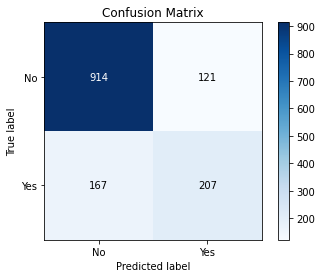

In [220]:
#M enampilkan visualisasi confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, loreg_result)

**Interpretasi**

(Diisi oleh Mba Widi)

**Classification Report**

In [221]:
# Menegecek classification report
pd.DataFrame(metrics.classification_report(y_test, loreg_result, target_names=['not churn','churn'], output_dict=True))

,not churn,churn,accuracy,macro avg,weighted avg
precision,0.845513,0.631098,0.7956,0.738305,0.788600
recall,0.883092,0.553476,0.7956,0.718284,0.795600
f1-score,0.863894,0.589744,0.7956,0.726819,0.791125
support,1035.000000,374.000000,0.7956,1409.000000,1409.000000


**Interpretasi**

(Diisi oleh Mba Widi)

**ROC Cuve**

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


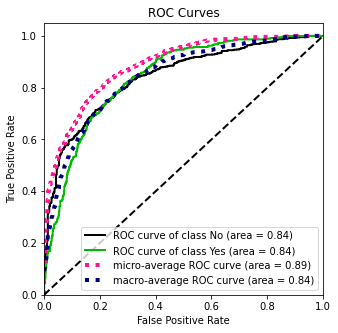

In [222]:
# Menampilkan ROC curve
skplt.metrics.plot_roc_curve(y_test, loreg_proba, figsize=(5,5))

**Interpretasi**

(Diisi oleh Mba Widi)

###**KNN Evaluation**

In [223]:
# KNN Prediction
## Menghasilkan hard prediction dari KNN model menggunakan X_test
knn_result = knn_model.predict(X_test_edit)

## Menghasilkan probability prediction dari KNN model menggunakan X_test
knn_proba = knn_model.predict_proba(X_test_edit)

**Confusion Matrix**

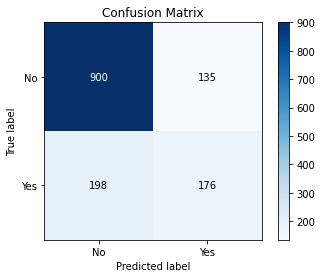

In [224]:
#Menampilkan visualisasi confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, knn_result)

**Interpretasi**

Mengingat tujuan tugas adalah untuk memprediksi/mengklasifikasi customer yang akan berhenti menggunakan produk perusahaan (Churn = Yes), maka nilai yang diperhatikan adalah nilai True Positive (Churn = Yes), yaitu 176 yang diperoleh dari metode KNN

Sedangkan nilai dari True Negative (Churn = No) kurang penting, karena tujuan tugas tidak untuk memprediksi customer yang akan bertahan menggunakan produk perusahaan (Churn = No), yaitu 900 yang diperoleh dari metode KNN

**Classification Report**

In [225]:
#Menegecek classification report
pd.DataFrame(metrics.classification_report(y_test, knn_result, target_names=['not churn','churn'], output_dict=True))

,not churn,churn,accuracy,macro avg,weighted avg
precision,0.819672,0.565916,0.763662,0.692794,0.752316
recall,0.869565,0.470588,0.763662,0.670077,0.763662
f1-score,0.843882,0.513869,0.763662,0.678875,0.756284
support,1035.000000,374.000000,0.763662,1409.000000,1409.000000


**Interpretasi**

Mengingat saat dilakukan pemeriksaan data dengan EDA, diketahui bahwa adanya jumlah antara customer yang berhenti dan yang bertahan yang berbeda jauh, yaitu sebesar 27% dengan 73% sehingga nilai akurasi pada Classification Report tidak dapat dipakai untuk menghindari bias.

Oleh karena itu, difokuskan pada nilai f1-score untuk churn, yaitu sebesar 0,5138 yang diperoleh dengan metode KNN

**ROC Curve**

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


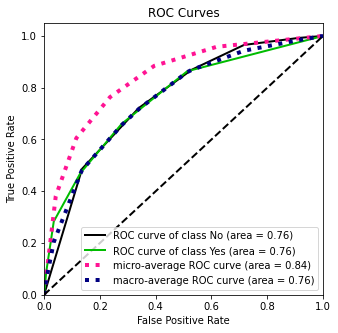

In [226]:
#Menampilkan ROC curve
skplt.metrics.plot_roc_curve(y_test, knn_proba, figsize=(5,5))

**Interpretasi**

Mengingat yang diperhatikan adalah customer yang berhenti menggunakan produk perusahaan, maka nilai yang difokuskan adalah nilai ROC untuk class Yes, yaitu sebesare 76% yang diperoleh dengan metode KNN

###**Decision Tree Evaluation**

In [227]:
# Decision Tree Prediction
## Menghasilkan hard prediction dari Decision Tree model menggunakan X_test
dt_result = dt_model.predict(X_test_edit)

## Menghasilkan probability prediction dari Decision Tree model menggunakan X_test
dt_proba = dt_model.predict_proba(X_test_edit)

**Confusion Matrix**

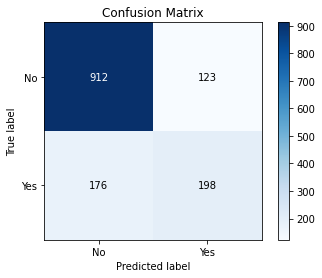

In [228]:
#Menampilkan visualisasi confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, dt_result)

**Interpretasi**

Mengingat tujuan tugas adalah untuk memprediksi/mengklasifikasi customer yang akan berhenti menggunakan produk perusahaan (Churn = Yes), maka nilai yang diperhatikan adalah nilai True Positive (Churn = Yes), yaitu 198 yang diperoleh dari metode Decision Tree

Sedangkan nilai dari True Negative (Churn = No) kurang penting, karena tujuan tugas tidak untuk memprediksi customer yang akan bertahan menggunakan produk perusahaan (Churn = No), yaitu 912 yang diperoleh dari metode Decision Tree

**Classification Report**

In [229]:
#Menegecek classification report
pd.DataFrame(metrics.classification_report(y_test, dt_result, target_names=['not churn','churn'], output_dict=True))

,not churn,churn,accuracy,macro avg,weighted avg
precision,0.838235,0.616822,0.787793,0.727529,0.779464
recall,0.881159,0.529412,0.787793,0.705286,0.787793
f1-score,0.859162,0.569784,0.787793,0.714473,0.782350
support,1035.000000,374.000000,0.787793,1409.000000,1409.000000


**Interpretasi**

Mengingat saat dilakukan pemeriksaan data dengan EDA, diketahui bahwa adanya jumlah antara customer yang berhenti dan yang bertahan yang berbeda jauh, yaitu sebesar 27% dengan 73% sehingga nilai akurasi pada Classification Report tidak dapat dipakai untuk menghindari bias.

Oleh karena itu, difokuskan pada nilai f1-score untuk churn, yaitu sebesar 0,5697 yang diperoleh dengan metode Decision Tree

**ROC Curve**

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


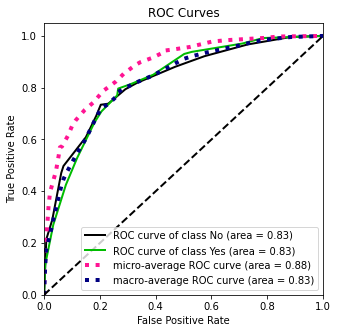

In [230]:
#Menampilkan ROC curve
skplt.metrics.plot_roc_curve(y_test, dt_proba, figsize=(5,5))

**Interpretasi**

Mengingat yang diperhatikan adalah customer yang berhenti menggunakan produk perusahaan, maka nilai yang difokuskan adalah nilai ROC untuk class Yes, yaitu sebesare 83% yang diperoleh dengan metode Decision Tree

###**Random Forest**

In [231]:
# Random Forest Prediction
## Menghasilkan hard prediction dari Random Forest model menggunakan X_test
rf_result = rf_model.predict(X_test_edit)

## Menghasilkan probability prediction dari Random Forest model menggunakan X_test
rf_proba = rf_model.predict_proba(X_test_edit)

**Confusion Matrix**

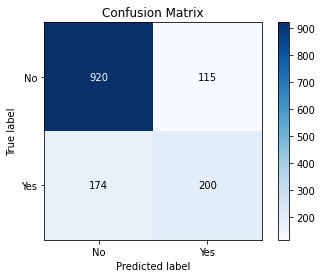

In [232]:
#Menampilkan visualisasi confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, rf_result)

**Interpretasi**

Mengingat tujuan tugas adalah untuk memprediksi/mengklasifikasi customer yang akan berhenti menggunakan produk perusahaan (Churn = Yes), maka nilai yang diperhatikan adalah nilai True Positive (Churn = Yes), yaitu 200 yang diperoleh dari metode Random Forest

Sedangkan nilai dari True Negative (Churn = No) kurang penting, karena tujuan tugas tidak untuk memprediksi customer yang akan bertahan menggunakan produk perusahaan (Churn = No), yaitu 920 yang diperoleh dari metode Random Forest

**Classification Report**

In [233]:
#Menegecek classification report
pd.DataFrame(metrics.classification_report(y_test, rf_result, target_names=['not churn','churn'], output_dict=True))

,not churn,churn,accuracy,macro avg,weighted avg
precision,0.840951,0.634921,0.79489,0.737936,0.786263
recall,0.888889,0.534759,0.79489,0.711824,0.794890
f1-score,0.864256,0.580552,0.79489,0.722404,0.788950
support,1035.000000,374.000000,0.79489,1409.000000,1409.000000


**Interpretasi**

Mengingat saat dilakukan pemeriksaan data dengan EDA, diketahui bahwa adanya jumlah antara customer yang berhenti dan yang bertahan yang berbeda jauh, yaitu sebesar 27% dengan 73% sehingga nilai akurasi pada Classification Report tidak dapat dipakai untuk menghindari bias.

Oleh karena itu, difokuskan pada nilai f1-score untuk churn, yaitu sebesar 0,5805 yang diperoleh dengan metode Random Forest

**ROC Curve**

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


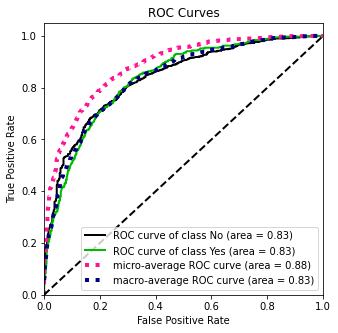

In [234]:
#Menampilkan ROC curve
skplt.metrics.plot_roc_curve(y_test, rf_proba, figsize=(5,5))

**Interpretasi**

Mengingat yang diperhatikan adalah customer yang berhenti menggunakan produk perusahaan, maka nilai yang difokuskan adalah nilai ROC untuk class Yes, yaitu sebesare 83% yang diperoleh dengan metode Decision Tree

###**Bagging**

In [309]:
# Bagging
## Menghasilkan hard prediction dari Bagging model menggunakan X_test
bag_result = bag_model.predict(X_test_edit)

## Menghasilkan probability prediction dari Bagging model menggunakan X_test
bag_proba = bag_model.predict_proba(X_test_edit)

**Confusion Matrix**

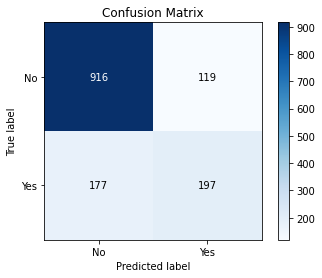

In [310]:
#M enampilkan visualisasi confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, bag_result)

**Interpretasi**

(Diisi oleh Mba Widi)

**Classification Report**

In [311]:
# Menegecek classification report
pd.DataFrame(metrics.classification_report(y_test, bag_result, target_names=['not churn','churn'], output_dict=True))

,not churn,churn,accuracy,macro avg,weighted avg
precision,0.838060,0.623418,0.789922,0.730739,0.781086
recall,0.885024,0.526738,0.789922,0.705881,0.789922
f1-score,0.860902,0.571014,0.789922,0.715958,0.783955
support,1035.000000,374.000000,0.789922,1409.000000,1409.000000


**Interpretasi**

(Diisi oleh Mba Widi)

**ROC Cuve**

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


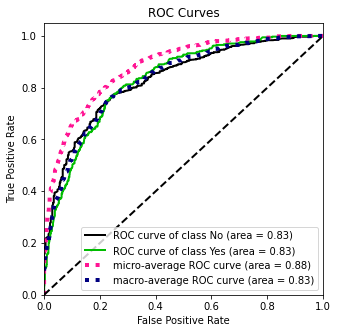

In [312]:
# Menampilkan ROC curve
skplt.metrics.plot_roc_curve(y_test, bag_proba, figsize=(5,5))

**Interpretasi**

(Diisi oleh Mba Widi)

###**Ada Boost**

In [237]:
# Ada Boost
## Menghasilkan hard prediction dari Ada Boost model menggunakan X_test
ada_result = ada_model.predict(X_test_edit)

## Menghasilkan probability prediction dari Ada Boost model menggunakan X_test
ada_proba = ada_model.predict_proba(X_test_edit)

**Confusion Matrix**

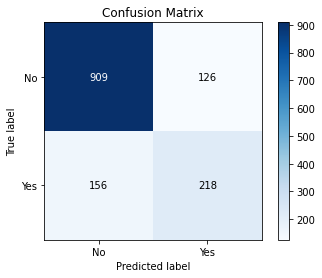

In [238]:
#M enampilkan visualisasi confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, ada_result)

**Interpretasi**

(Diisi oleh Mba Widi)

**Classification Report**

In [239]:
# Menegecek classification report
pd.DataFrame(metrics.classification_report(y_test, ada_result, target_names=['not churn','churn'], output_dict=True))

,not churn,churn,accuracy,macro avg,weighted avg
precision,0.853521,0.633721,0.799858,0.743621,0.795178
recall,0.878261,0.582888,0.799858,0.730574,0.799858
f1-score,0.865714,0.607242,0.799858,0.736478,0.797106
support,1035.000000,374.000000,0.799858,1409.000000,1409.000000


**Interpretasi**

(Diisi oleh Mba Widi)

**ROC Cuve**

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


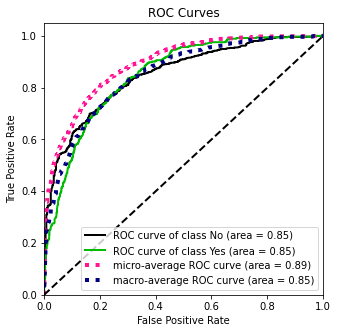

In [240]:
# Menampilkan ROC curve
skplt.metrics.plot_roc_curve(y_test, ada_proba, figsize=(5,5))

**Interpretasi**

(Diisi oleh Mba Widi)

###**Gradient Boosting Classifier**

In [241]:
# Gradient Boosting Classifier
## Menghasilkan hard prediction dari Gradient Boosting Classifier model menggunakan X_test
gbc_result = gbc_model.predict(X_test_edit)

## Menghasilkan probability prediction dari Gradient Boosting Classifier model menggunakan X_test
gbc_proba = gbc_model.predict_proba(X_test_edit)

**Confusion Matrix**

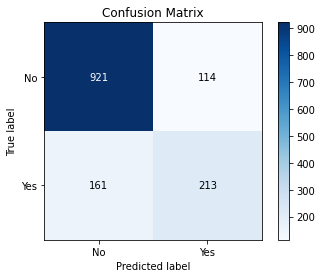

In [242]:
#M enampilkan visualisasi confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, gbc_result)

**Interpretasi**

(Diisi oleh Mba Widi)

**Classification Report**

In [243]:
# Menegecek classification report
pd.DataFrame(metrics.classification_report(y_test, gbc_result, target_names=['not churn','churn'], output_dict=True))

,not churn,churn,accuracy,macro avg,weighted avg
precision,0.851201,0.651376,0.804826,0.751289,0.798161
recall,0.889855,0.569519,0.804826,0.729687,0.804826
f1-score,0.870099,0.607703,0.804826,0.738901,0.800450
support,1035.000000,374.000000,0.804826,1409.000000,1409.000000


**Interpretasi**

(Diisi oleh Mba Widi)

**ROC Cuver**

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


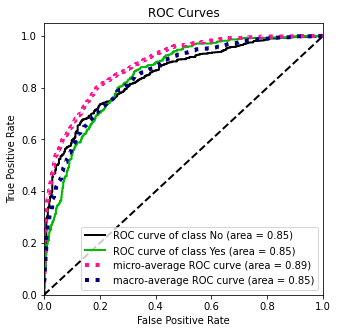

In [244]:
# Menampilkan ROC curve
skplt.metrics.plot_roc_curve(y_test, gbc_proba, figsize=(5,5))

**Interpretasi**

(Diisi oleh Mba Widi)

###**SVM RBF**

In [245]:
# SVM RBF prediction
## Menghasilkan hard prediction dari SVM RBF model menggunakan X_test
svm_result = svm_model.predict(X_test_edit)

## Menghasilkan probability prediction dari SVM RBF model menggunakan X_test
svm_proba = svm_model.predict_proba(X_test_edit)

**Confusion Matrix**

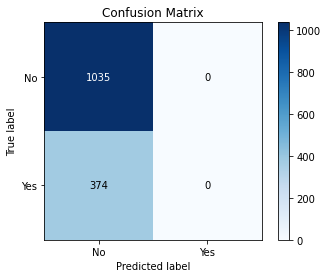

In [246]:
#Menampilkan visualisasi confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, svm_result)

**Interpretasi**

Mengingat tujuan tugas adalah untuk memprediksi/mengklasifikasi customer yang akan berhenti menggunakan produk perusahaan (Churn = Yes), maka nilai yang diperhatikan adalah nilai True Positive (Churn = Yes), yaitu 0 yang diperoleh dari metode SVM RBF

Sedangkan nilai dari True Negative (Churn = No) kurang penting, karena tujuan tugas tidak untuk memprediksi customer yang akan bertahan menggunakan produk perusahaan (Churn = No), yaitu 1035 yang diperoleh dari metode SVM RBF

**Classification Report**

In [247]:
#Menegecek classification report
pd.DataFrame(metrics.classification_report(y_test, svm_result, target_names=['not churn','churn'], output_dict=True))

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,not churn,churn,accuracy,macro avg,weighted avg
precision,0.734564,0.0,0.734564,0.367282,0.539584
recall,1.000000,0.0,0.734564,0.500000,0.734564
f1-score,0.846972,0.0,0.734564,0.423486,0.622155
support,1035.000000,374.0,0.734564,1409.000000,1409.000000


**Interpretasi**

Mengingat saat dilakukan pemeriksaan data dengan EDA, diketahui bahwa adanya jumlah antara customer yang berhenti dan yang bertahan yang berbeda jauh, yaitu sebesar 27% dengan 73% sehingga nilai akurasi pada Classification Report tidak dapat dipakai untuk menghindari bias.

Oleh karena itu, difokuskan pada nilai f1-score untuk churn, yaitu sebesar 0 yang diperoleh dengan metode SVM RBF

**ROC Curve**

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


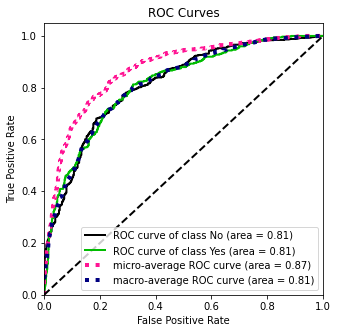

In [248]:
#Menampilkan ROC curve
skplt.metrics.plot_roc_curve(y_test, svm_proba, figsize=(5,5))

**Interpretasi**

Mengingat yang diperhatikan adalah customer yang berhenti menggunakan produk perusahaan, maka nilai yang difokuskan adalah nilai ROC untuk class Yes, yaitu sebesare 81% yang diperoleh dengan metode SVM RBF

###**XGBoost**

In [249]:
# XGBoost prediction
## Menghasilkan hard prediction dari XGBoost model menggunakan X_test
xgb_result = xgb_model.predict(X_test_edit)

## Menghasilkan probability prediction dari XGBoost model menggunakan X_test
xgb_proba = xgb_model.predict_proba(X_test_edit)

**Confusion Matrix**

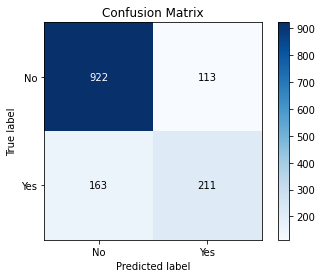

In [250]:
#Menampilkan visualisasi confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, xgb_result)

**Interpretasi**

Mengingat tujuan tugas adalah untuk memprediksi/mengklasifikasi customer yang akan berhenti menggunakan produk perusahaan (Churn = Yes), maka nilai yang diperhatikan adalah nilai True Positive (Churn = Yes), yaitu 211 yang diperoleh dari metode XGBoost

Sedangkan nilai dari True Negative (Churn = No) kurang penting, karena tujuan tugas tidak untuk memprediksi customer yang akan bertahan menggunakan produk perusahaan (Churn = No), yaitu 922 yang diperoleh dari metode XGBoost

**Classification Report**

In [251]:
#Menegecek classification report
pd.DataFrame(metrics.classification_report(y_test, xgb_result, target_names=['not churn','churn'], output_dict=True))

,not churn,churn,accuracy,macro avg,weighted avg
precision,0.849770,0.651235,0.804116,0.750502,0.797071
recall,0.890821,0.564171,0.804116,0.727496,0.804116
f1-score,0.869811,0.604585,0.804116,0.737198,0.799410
support,1035.000000,374.000000,0.804116,1409.000000,1409.000000


**Interpretasi**

Mengingat saat dilakukan pemeriksaan data dengan EDA, diketahui bahwa adanya jumlah antara customer yang berhenti dan yang bertahan yang berbeda jauh, yaitu sebesar 27% dengan 73% sehingga nilai akurasi pada Classification Report tidak dapat dipakai untuk menghindari bias.

Oleh karena itu, difokuskan pada nilai f1-score untuk churn, yaitu sebesar 0,6045 yang diperoleh dengan metode XGBoost

**ROC Curve**

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


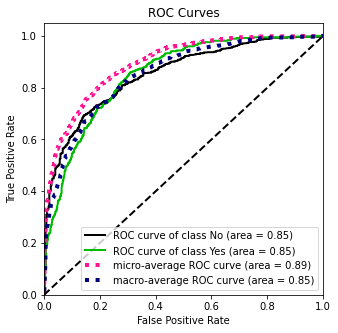

In [252]:
#Menampilkan ROC curve
skplt.metrics.plot_roc_curve(y_test, xgb_proba, figsize=(5,5))

**Interpretasi**

Mengingat yang diperhatikan adalah customer yang berhenti menggunakan produk perusahaan, maka nilai yang difokuskan adalah nilai ROC untuk class Yes, yaitu sebesare 85% yang diperoleh dengan metode XGBoost

**Kesimpulan dari Interpretasi**

(Diisi oleh Mba Widi)

(Contoh:
Dari hasil interpretasi pada model classification KNN, DT, RF, SVM RBF, dan XGBoost, dianalisa True Negative dari Confusion Matrix, f1-score dari Churn pada Classification Report, dan nilai ROC class Yes dari ROC Curve, maka dapat disimpulkan nilai tertinggi dihasilkan oleh model classification XGBoost dengan:

- True Negative = 211
- f1-score Churn = 0,6045
- ROC Class Yes = 85%

Oleh karena itu, dapat disimpulkan model classification XGBoost adalah model yang terbaik, karena memberikan hasil yang lebih baik dalam memprediksi/mengklasifikasi customer yang berhenti menggunakan produk perusahaan (Churn = Yes))

# Business Related Metrics

Berdasarkan model terbaik, dilakukan evaluasi metrik lainnya:
- Lift Curve
- Cummulative Gain Curve
- Profit Curve

**Lift Curve**

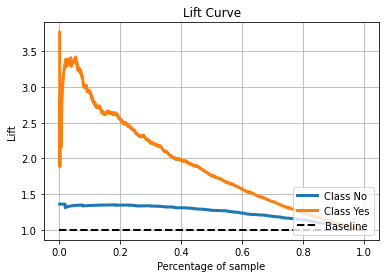

In [253]:
skplt.metrics.plot_lift_curve(y_test, xgb_proba)

**Interpretasi**

Mengikuti instruksi dari atas, jika dilihat pada 20% desil yang terbaik, maka dapat diketahui dengan menggunakan model yang sudah dibuat akan lebih efektif sebesar 2,5 kali lipat dibandingkan jika tidak menggunakan model sama sekali atau random (baseline) untuk memprediksi apakah customer akan churn atau tidak

**Cummulative Gain Curve**

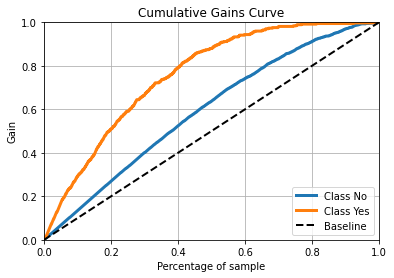

In [254]:
skplt.metrics.plot_cumulative_gain(y_test, xgb_proba)

**Interpretasi**

Mengikuti instruksi dari atas, jika dilihat pada 20% desil yang terbaik, maka dapat diketahui dengan menggunakan model yang sudah dibuat akan dapat memperoleh hasil sekitar 50% dari kelas target yang diinginkan

Artinya dengan menggunakan 20% desil yang terbaik, maka model sudah dapat memprediksi 50% dari kelas target dengan benar

Sebagai contoh jika ada rencana pemberian voucher untuk mempertahankan customer yang akan churn, maka dapat dilakukan dengan menggunakan 20% desil terbaik untuk mempertahankan 50% dari customer yang ingin dipertahankan

**Profit Curve**

Misal:

1. Perusahan mengeluarkan `$150` dolar jika bisa me-retain customer yang akan churn (dalam bentuk promosi, marketing, dll)
2. Jika perusahaan dapat memprediksi dengan tepat customer yang akan pergi dan mampu me-retain customer kembali, maka akan memperoleh keuntungan berdasarkan lifetime value dikurangi biaya retain (`$325` - `$150`)

In [255]:
#Membuat confusion matrix untuk perhitungan cost-benefit
def standard_confusion_matrix(y_true, y_pred):
    [[tn, fp], [fn, tp]] = metrics.confusion_matrix(y_true, y_pred)
    return np.array([[tp, fp], [fn, tn]])

#Menampilkan visualisasi profit curve
#Parameter 1: Objek model
#Parameter 2: Matrix cost-benefit
#Parameter 3: Nilai probabilitas untuk kelas positif
#Parameter 4: Nilai y sebenarnya
def plot_profit_curve(model_object, costbenefit_mat, y_proba, y_test):

    #Profit curve data
    profits = []
    thresholds = sorted(y_proba, reverse=True)

    #Mengubah data pada y_test (Yes/No menjadi 1/0) dengan menggunakan method get_dummies
    y_test_edit = pd.get_dummies(y_test, drop_first = True)

    #Untuk tiap threshold, hitung profit - mulai dari threshold terbesar
    for T in thresholds:
        y_pred = (y_proba > T).astype(int)
        confusion_mat = metrics.confusion_matrix(y_test_edit, y_pred)
        #Menghitung total profit dari threshold berikut
        profit = sum(sum(confusion_mat * costbenefit_mat)) / len(y_test)
        profits.append(profit)
    
    #Menampilkan visualisasi profit curve
    model_name = model_object.__class__.__name__
    max_profit = max(profits)
    plt.plot(np.linspace(0, 1, len(y_test)), profits, label = '{}, max profit ${:.2f} per user'.format(model_name, max_profit))

#Membuat cost benefit matrix, dengan catatan
##0 jika tidak memberikan voucher (True Negative, False Negative)
##-159 jika gagal mempertahankan customer yang akan churn (False Positive)
##(325-150) jika berhasil mempertahankan customer yang akan churn (True Positive)

costbenefit_mat = np.array([[0, -150],
                            [0, (325-150)]])

In [256]:
#Mengecek cost benefit matrix
costbenefit_mat

array([[   0, -150],
       [   0,  175]])

In [257]:
#Mengecek model confusion matrix
metrics.confusion_matrix(y_test, xgb_result)

array([[922, 113],
       [163, 211]])

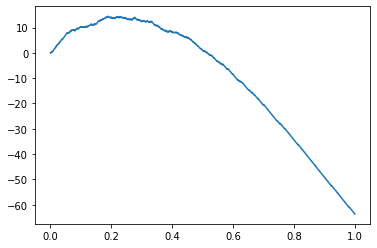

In [258]:
#Menampilkan visualisasi profit curve
plot_profit_curve(xgb_result, costbenefit_mat, xgb_proba[:,1], y_test)

**Interpretasi**

Mengikuti instruksi dari atas, jika dilihat pada 20% desil yang terbaik, maka dapat diketahui dengan model yang dibuat, maka profit yang akan diperoleh adalah sekitar 15 dollar

# Business Simulation

(Dibuat oleh Mba Widi)